# Transfer Learning
Adapted from https://www.kaggle.com/dansbecker/transfer-learning
<br> Predict whether an image of a dog is upright or sideways using the adadpted Resnet50 model. 

## Specify Model

In [2]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = '../models/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

## Compile Model

In [3]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit Model

In [39]:
%%time
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '../data/raw/dogs-gone-sideways/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '../data/raw/dogs-gone-sideways/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=1)

Found 220 images belonging to 2 classes.
Found 217 images belonging to 2 classes.
Epoch 1/5
3/3 [==============================] - 32s 11s/step - loss: 0.9145 - acc: 0.4175 - val_loss: 0.5584 - val_acc: 0.6875
Epoch 2/5
3/3 [==============================] - 41s 14s/step - loss: 0.5456 - acc: 0.7361 - val_loss: 0.5563 - val_acc: 0.6562
Epoch 3/5
3/3 [==============================] - 41s 14s/step - loss: 0.4637 - acc: 0.7639 - val_loss: 0.3655 - val_acc: 0.8438
Epoch 4/5
3/3 [==============================] - 42s 14s/step - loss: 0.3466 - acc: 0.8889 - val_loss: 0.2879 - val_acc: 0.8750
Epoch 5/5
3/3 [==============================] - 41s 14s/step - loss: 0.2800 - acc: 0.9028 - val_loss: 0.1733 - val_acc: 0.9688
Wall time: 3min 16s


In [67]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

# image_dir = '../data/raw/dogs-gone-sideways/val/upright'
# img_paths = [os.path.join(image_dir, filename) for filename in [os.listdir(image_dir), os.listdir(image_dir)]]

upright_dir = '../data/raw/dogs-gone-sideways/val/upright'
sideways_dir = '../data/raw/dogs-gone-sideways/val/sideways'

def list_all_files(dir):
    return [os.path.join(dir, f) for f in os.listdir(dir)]

img_paths = np.random.choice(list_all_files(upright_dir) + list_all_files(sideways_dir), 10)

array(['../data/raw/dogs-gone-sideways/val/sideways\\dog.8420.jpg',
       '../data/raw/dogs-gone-sideways/val/sideways\\dog.8343.jpg',
       '../data/raw/dogs-gone-sideways/val/upright\\dog.8963.jpg',
       '../data/raw/dogs-gone-sideways/val/sideways\\dog.7656.jpg',
       '../data/raw/dogs-gone-sideways/val/sideways\\dog.9896.jpg',
       '../data/raw/dogs-gone-sideways/val/sideways\\dog.7603.jpg',
       '../data/raw/dogs-gone-sideways/val/sideways\\dog.11120.jpg',
       '../data/raw/dogs-gone-sideways/val/sideways\\dog.1113.jpg',
       '../data/raw/dogs-gone-sideways/val/sideways\\dog.8252.jpg',
       '../data/raw/dogs-gone-sideways/val/upright\\dog.9469.jpg'],
      dtype='<U57')

In [79]:
test_data = read_and_prep_images(img_paths)
preds = my_new_model.predict(test_data)

In [82]:
preds_bin = ['upright' if preds[i,0] < 0.5 else 'sideways' for i in range(0, len(preds))]

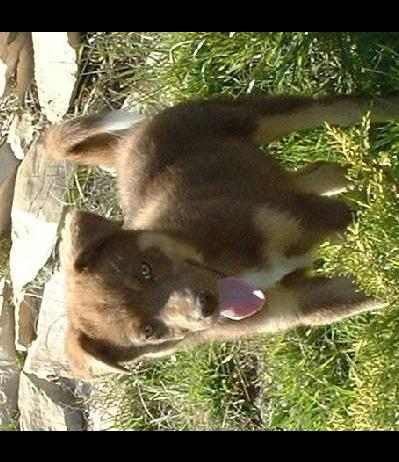

0.9888121 sideways


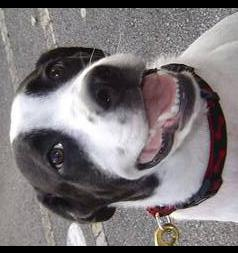

0.93941545 sideways


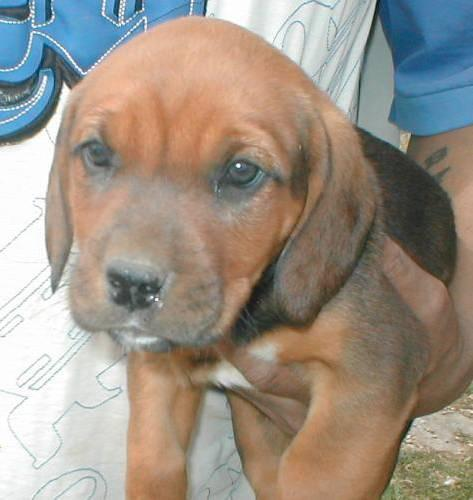

0.17907949 upright


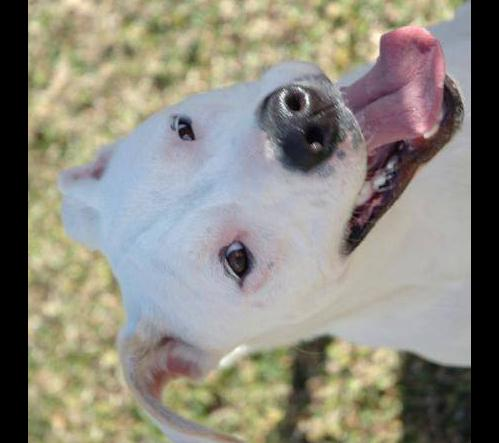

0.8511954 sideways


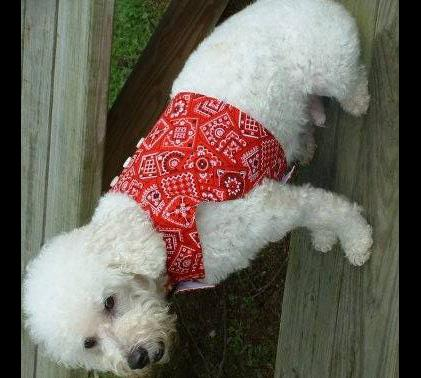

0.87537754 sideways


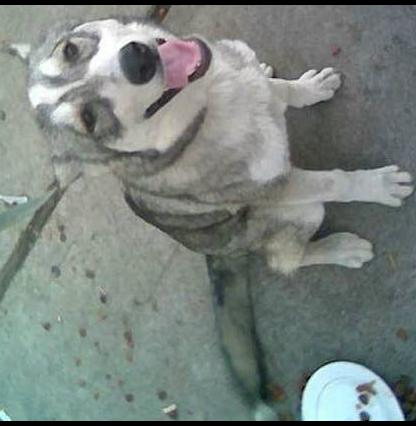

0.9397818 sideways


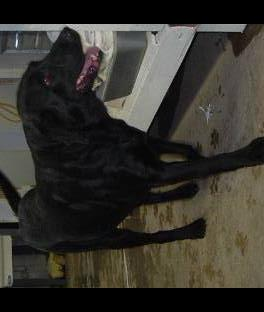

0.95965827 sideways


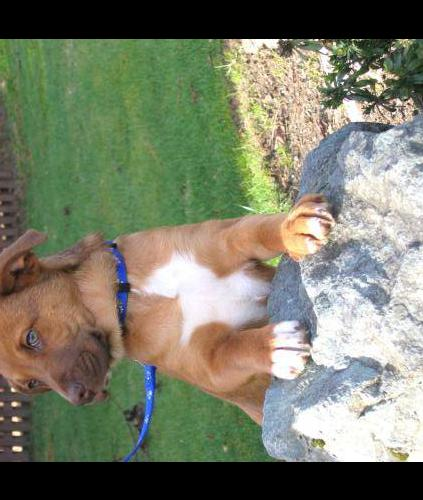

0.882058 sideways


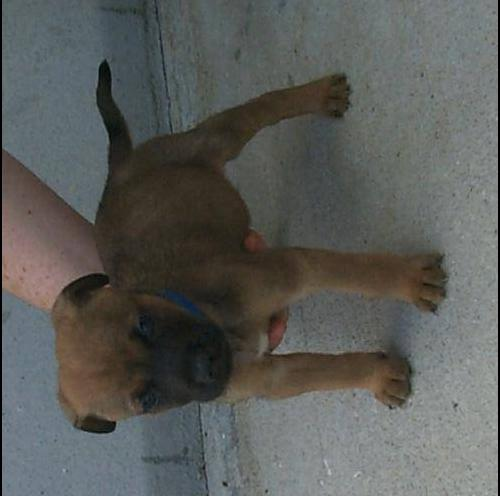

0.84709233 sideways


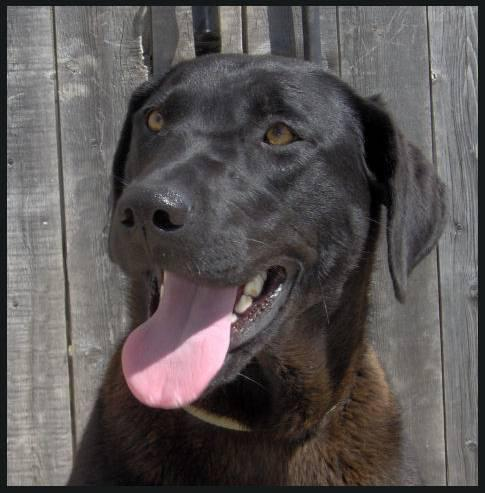

0.3506743 upright


In [83]:
from IPython.display import Image, display

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(preds[i,0], preds_bin[i])